#Análisis Exploratorio de Datos (EDA)

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("Mall_Customers.csv")
print(data.info())  # Información general del dataset
print(data.head())  # Vista preliminar de las primeras filas


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0, 0.5, 'Frecuencia')

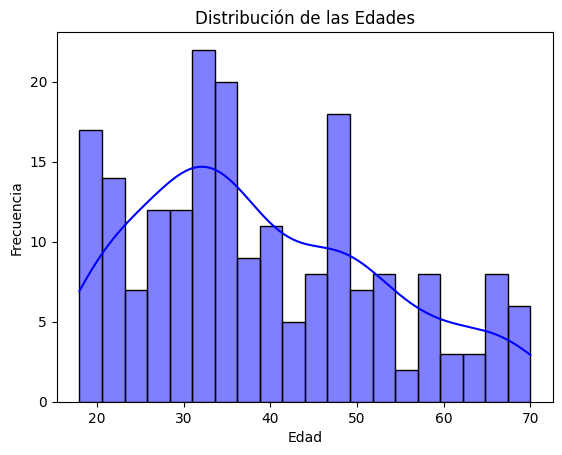

In [8]:
sns.histplot(data['Age'], kde=True, bins=20, color='blue')
plt.title('Distribución de las Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')


Text(0, 0.5, 'Frecuencia')

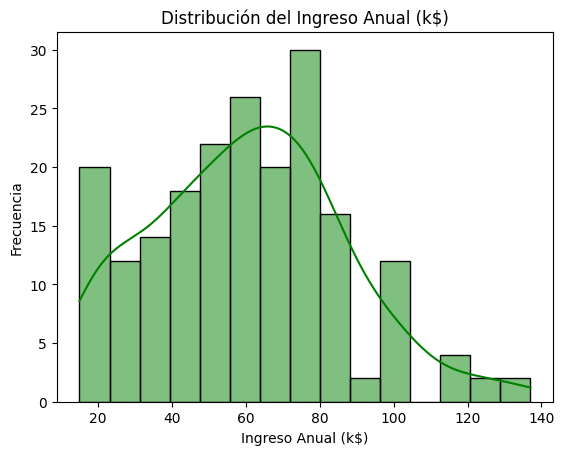

In [9]:
sns.histplot(data['Annual Income (k$)'], kde=True, bins=15, color='green')
plt.title('Distribución del Ingreso Anual (k$)')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

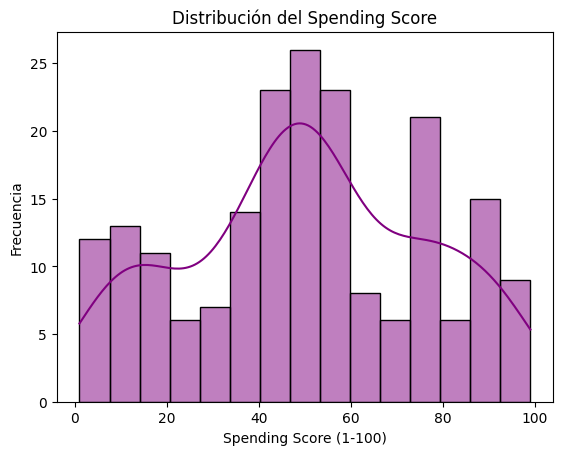

In [10]:
sns.histplot(data['Spending Score (1-100)'], kde=True, bins=15, color='purple')
plt.title('Distribución del Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frecuencia')


Text(0.5, 1.0, 'Relación entre Ingreso Anual y Spending Score')

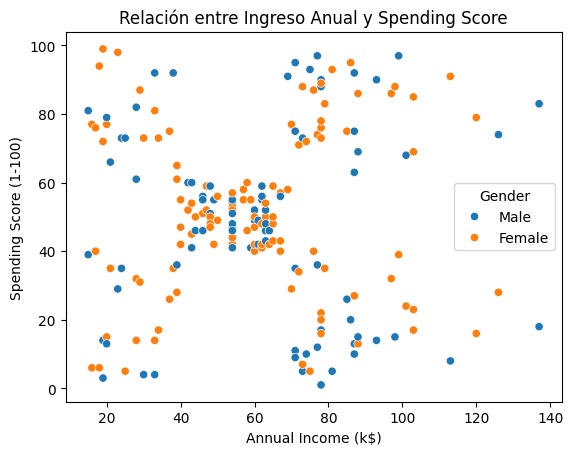

In [11]:
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Gender'])
plt.title('Relación entre Ingreso Anual y Spending Score')

<ipython-input-13-75391f1314c6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Gender'], y=data['Spending Score (1-100)'], palette='Set2')


Text(0.5, 1.0, 'Distribución del Spending Score por Género')

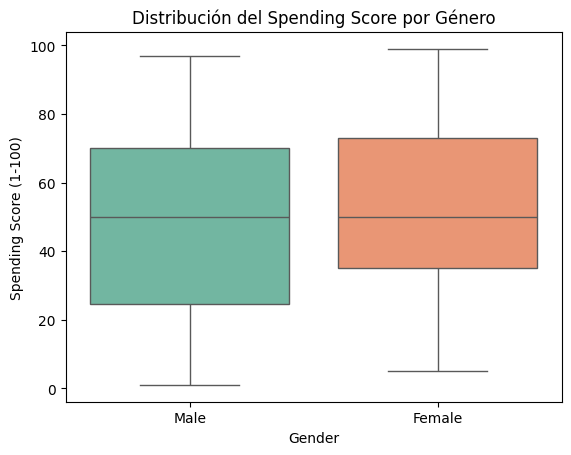

In [13]:
sns.boxplot(x=data['Gender'], y=data['Spending Score (1-100)'], palette='Set2')
plt.title('Distribución del Spending Score por Género')


Text(0.5, 1.0, 'Matriz de Correlación')

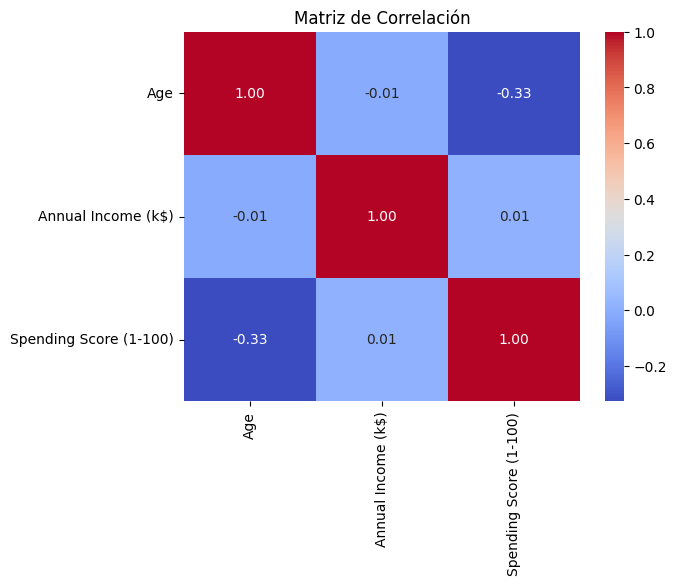

In [14]:
correlation_matrix = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')


#Pre Procesamiento de datos

In [1]:
#Uso de librerias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np

In [2]:
# Cargar los datos
rutadataset = 'Mall_Customers.csv'  # Ajusta la ruta si es necesario
data = pd.read_csv(rutadataset)

In [4]:
def clasificacion_clientes(spending_score):
    if spending_score >= 70:
        return 'VIP'
    elif spending_score >= 40:
        return 'Regular'
    else:
        return 'Bajo'

data['Customer_Type'] = data['Spending Score (1-100)'].apply(clasificacion_clientes)
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Customer_Type
0,1,Male,19,15,39,Bajo
1,2,Male,21,15,81,VIP
2,3,Female,20,16,6,Bajo
3,4,Female,23,16,77,VIP
4,5,Female,31,17,40,Regular
...,...,...,...,...,...,...
195,196,Female,35,120,79,VIP
196,197,Female,45,126,28,Bajo
197,198,Male,32,126,74,VIP
198,199,Male,32,137,18,Bajo


In [6]:
label_encoder = LabelEncoder()
data['Customer_Type_Code'] = label_encoder.fit_transform(data['Customer_Type'])
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Customer_Type,Customer_Type_Code
0,1,Male,19,15,39,Bajo,0
1,2,Male,21,15,81,VIP,2
2,3,Female,20,16,6,Bajo,0
3,4,Female,23,16,77,VIP,2
4,5,Female,31,17,40,Regular,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,VIP,2
196,197,Female,45,126,28,Bajo,0
197,198,Male,32,126,74,VIP,2
198,199,Male,32,137,18,Bajo,0


In [7]:
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = data['Customer_Type_Code']

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
y_train_categorical = to_categorical(y_train, num_classes=3)
y_test_categorical = to_categorical(y_test, num_classes=3)

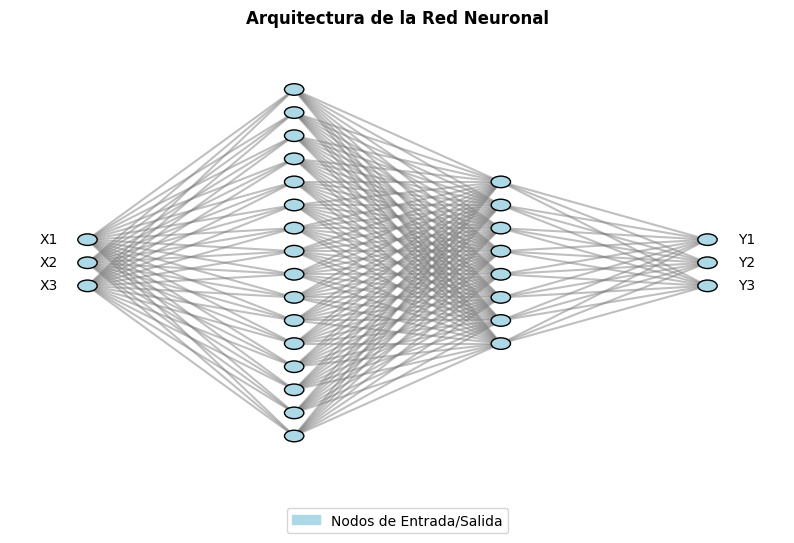

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def draw_neural_network(ax, layer_sizes):
    """
    Dibuja una red neuronal simple con una cantidad especificada de capas y neuronas.
    """
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)

    # Nodos
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='lightblue', ec='k', zorder=4)
            ax.add_artist(circle)
            if n == 0:
                ax.text(n*h_spacing + left - 0.05, layer_top - m*v_spacing, f"X{m+1}",
                        fontsize=10, ha="center", va="center")
            elif n == len(layer_sizes)-1:
                ax.text(n*h_spacing + left + 0.05, layer_top - m*v_spacing, f"Y{m+1}",
                        fontsize=10, ha="center", va="center")

    # Conexiones entre nodos
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for i in range(layer_size_a):
            for j in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - i*v_spacing, layer_top_b - j*v_spacing],
                                  c='gray', alpha=0.5)
                ax.add_artist(line)

    ax.axis('off')

# Inicializar la figura
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
ax.set_title("Arquitectura de la Red Neuronal", fontsize=12, weight="bold")

# Estructura de la red: 3 nodos entrada, 16 en primera oculta, 8 en segunda oculta, 3 salida
layer_sizes = [3, 16, 8, 3]
draw_neural_network(ax, layer_sizes)

# Leyenda
input_patch = mpatches.Patch(color='lightblue', label='Nodos de Entrada/Salida')
plt.legend(handles=[input_patch], loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=1)
plt.show()
